In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from obspy.taup import TauPyModel
from obspy.geodetics import degrees2kilometers, kilometer2degrees, gps2dist_azimuth
from mudpy import forward

In [2]:
path = '/Users/sydneydybing/SW4/strain/experiments/realistic_eq_sizes/'
stas = pd.read_csv(path + 'stas_w_p_s_traveltimes.csv')
hypo_lat = 35.7793
hypo_lon = -117.6204
hypo_depth = 7.5
mcmc_results = pd.read_csv(path + 'mcmc_arrays/mcmc_results_summary_with_quality.csv')
good_results = mcmc_results[mcmc_results['two_line_fit_qual'] == 'g']
bad_results = mcmc_results[mcmc_results['two_line_fit_qual'] == 'b']

In [3]:
# Steeper slope in log-space for higher magnitudes
# Later transition time in log-space for higher magnitudes
# Strong determinism shows up in these models, but not in real life

In [4]:
# Calculate earthquake source durations

# Get M0 from Mw, then use relation in Melgar and Hayes, 2017 to get duration

mags_for_relation = np.arange(5,8,0.05)
# print(mags_for_dur)

# Preferred params for source duration
apref_sd = -6.407
bpref_sd = 0.385

apref_rt = -5.323
bpref_rt = 0.293

source_durs = []
rise_times = []

for Mw in mags_for_relation:
    
    M0 = 10**(1.5*Mw + 9.05)
    # print(M0)
    
    log_sd = apref_sd + bpref_sd * np.log10(M0)
    source_dur = 10**log_sd
    source_durs.append(source_dur)
    
    log_rt = apref_rt + bpref_rt * np.log10(M0)
    rise_time = 10**log_rt
    rise_times.append(rise_time)

In [5]:
# good_results

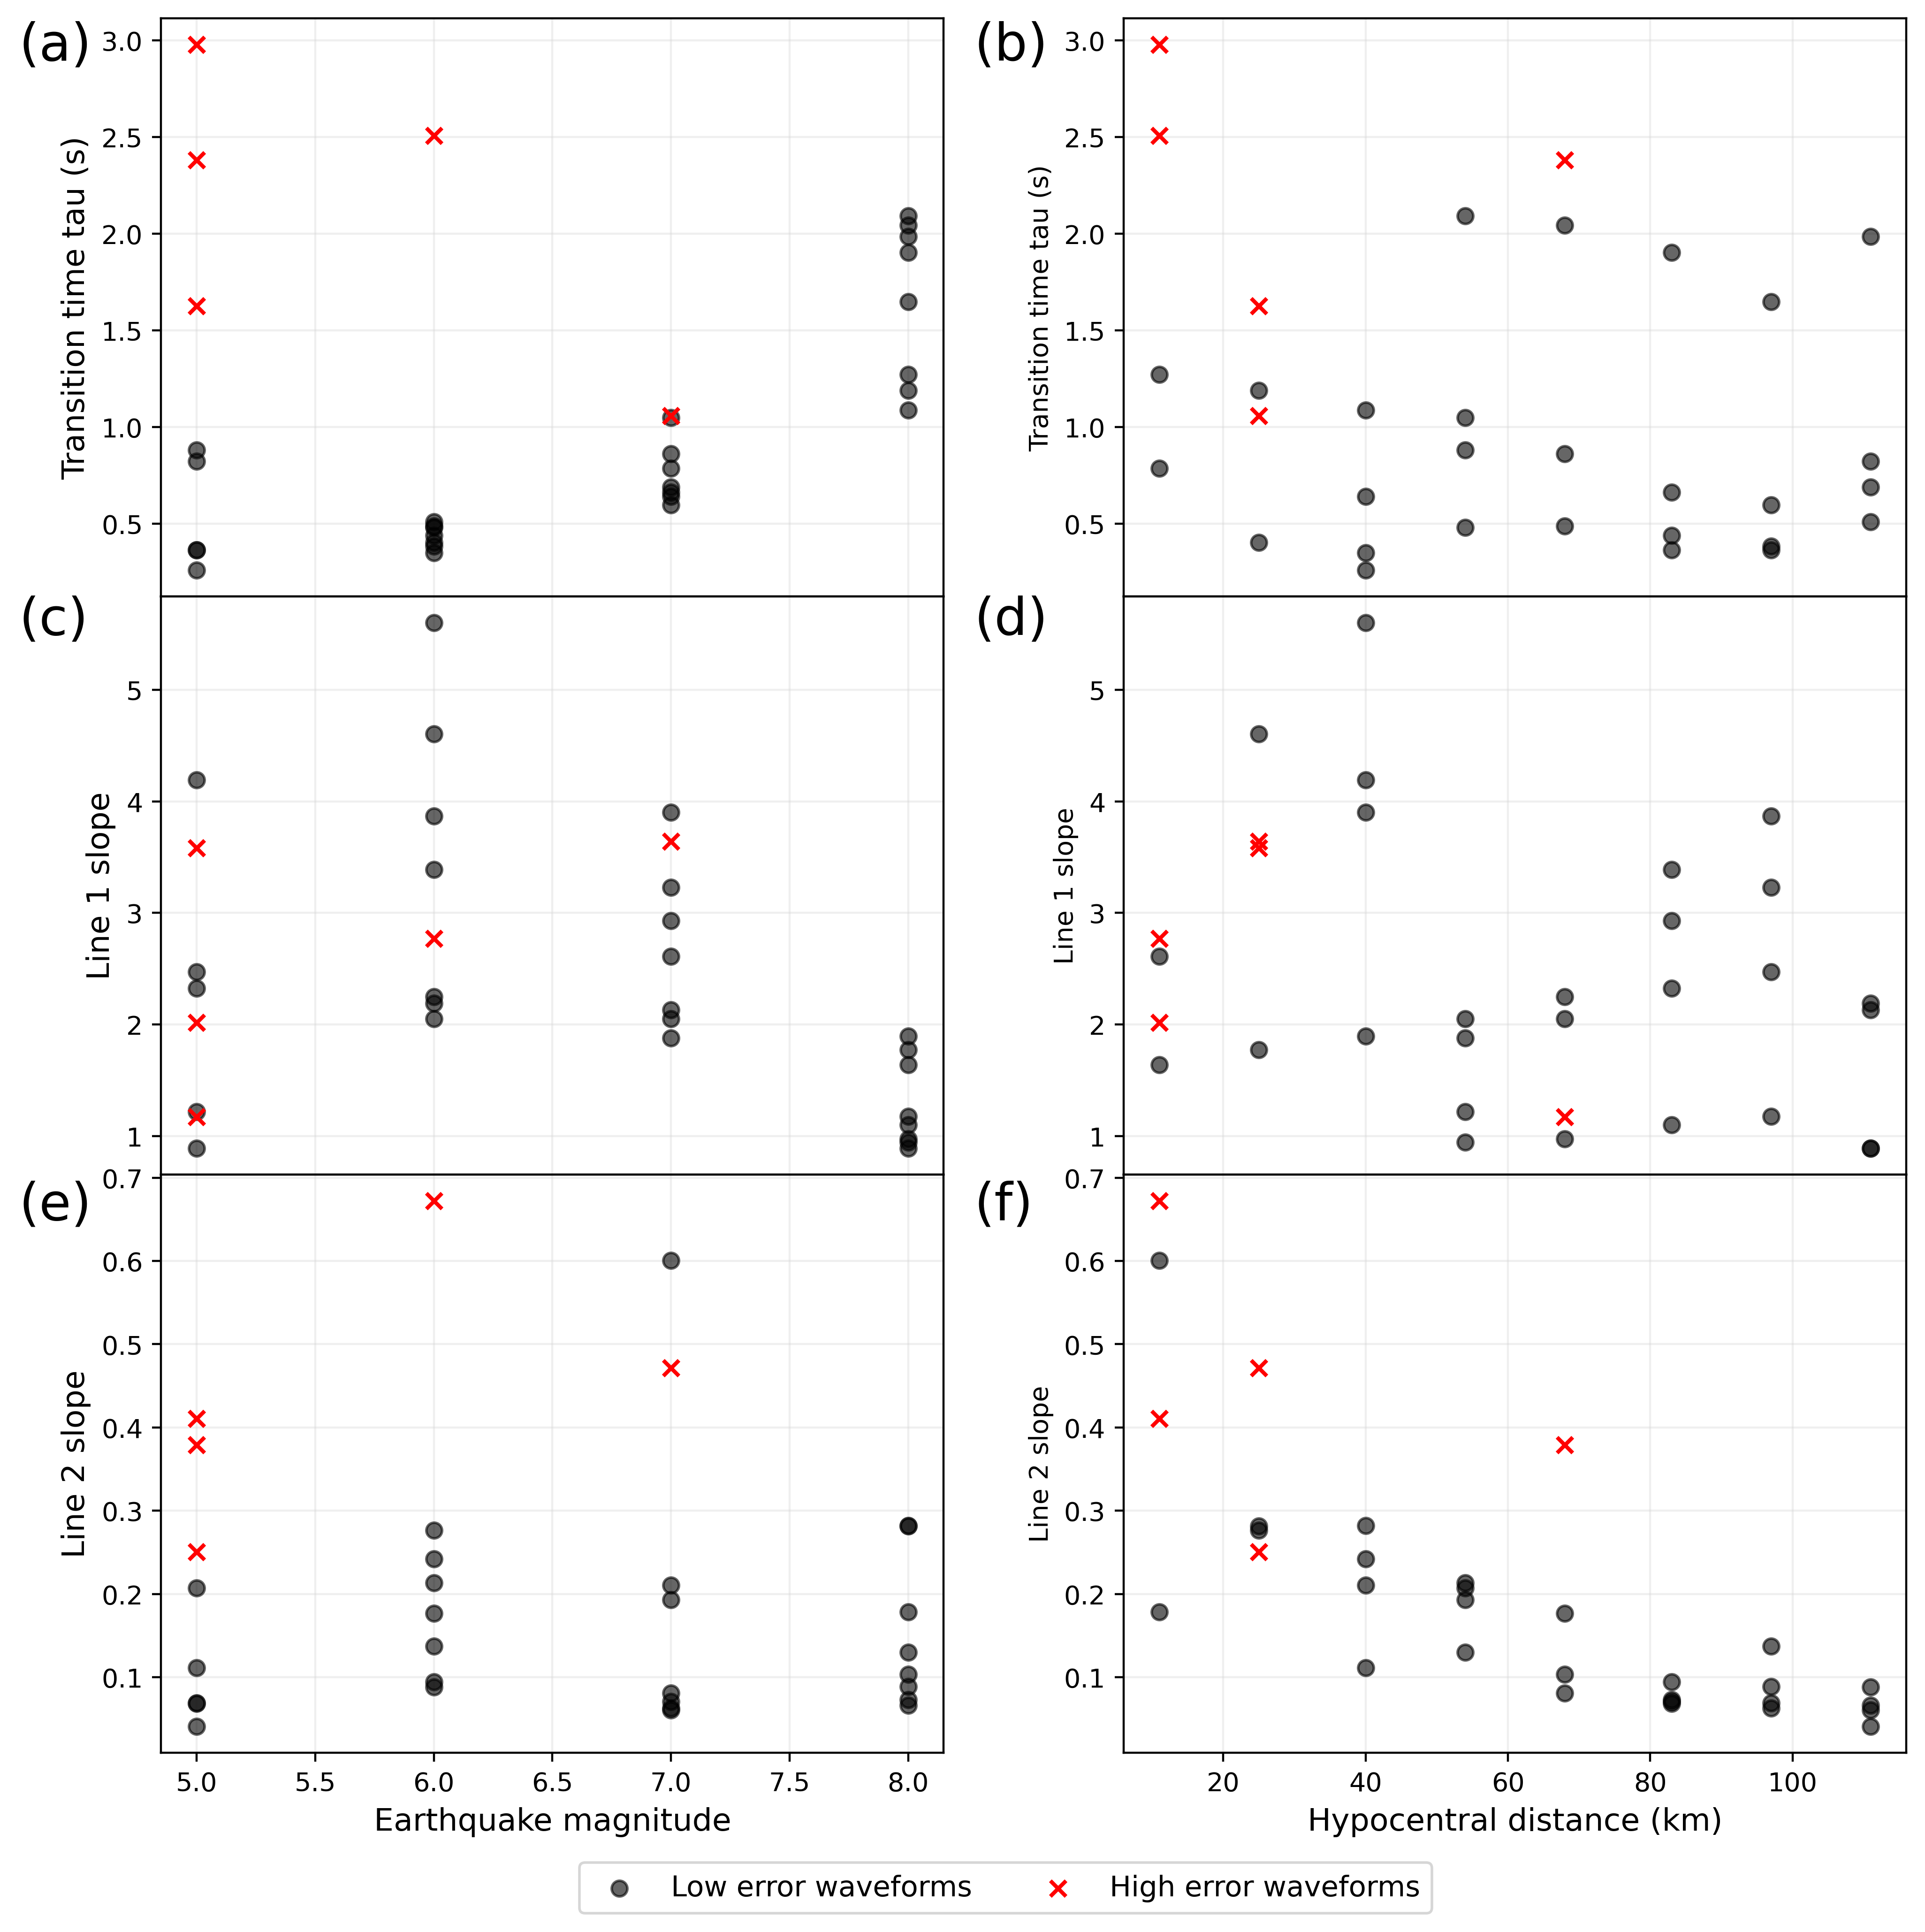

In [6]:
# Non-log versions

color = 'red'

fig = plt.figure(figsize = (12, 12), dpi = 400)

# mag vs tau
plt.subplot(321)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(good_results.mag.values, good_results.time_to_transition.values, marker = 'o', color = 'black', alpha = 0.6, label = 'Low error waveforms', zorder = 3)
plt.scatter(bad_results.mag.values, bad_results.time_to_transition.values, marker = 'x', color = color, label = 'High error waveforms', zorder = 3)
# plt.plot(mags_for_relation, source_durs, color = 'lime', label = 'Source duration scaling')
# plt.plot(mags_for_relation, rise_times, color = 'turquoise', label = 'Rise time scaling')
# plt.xlabel('Earthquake magnitude')
# plt.semilogy()
plt.ylabel('Transition time tau (s)', fontsize = 12)
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = 4.25, y = 2.9, s = '(a)', fontsize = 20)

# hypdist vs tau
plt.subplot(322)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(good_results.hypdist.values, good_results.time_to_transition.values, marker = 'o', color = 'black', alpha = 0.6, zorder = 3)
plt.scatter(bad_results.hypdist.values, bad_results.time_to_transition.values, marker = 'x', color = color, zorder = 3)
# plt.xlabel('Hypocentral distance (km)')
plt.ylabel('Transition time tau (s)')
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = -15, y = 2.9, s = '(b)', fontsize = 20)

# mag vs m1
plt.subplot(323)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(good_results.mag.values, good_results.m1.values, marker = 'o', color = 'black', alpha = 0.6, zorder = 3)
plt.scatter(bad_results.mag.values, bad_results.m1.values, marker = 'x', color = color, zorder = 3)
# plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 1 slope', fontsize = 12)
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = 4.25, y = 5.5, s = '(c)', fontsize = 20)

# hypdist vs m1
plt.subplot(324)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(good_results.hypdist.values, good_results.m1.values, marker = 'o', color = 'black', alpha = 0.6, zorder = 3)
plt.scatter(bad_results.hypdist.values, bad_results.m1.values, marker = 'x', color = color, zorder = 3)
# plt.xlabel('Hypocentral distance (km)')
plt.ylabel('Line 1 slope')
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, labelsize = 10)
plt.text(x = -15, y = 5.5, s = '(d)', fontsize = 20)

# mag vs m2
plt.subplot(325)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(good_results.mag.values, good_results.m2.values, marker = 'o', color = 'black', alpha = 0.6, zorder = 3)
plt.scatter(bad_results.mag.values, bad_results.m2.values, marker = 'x', color = color, zorder = 3)
plt.xlabel('Earthquake magnitude', fontsize = 12)
plt.ylabel('Line 2 slope', fontsize = 12)
plt.tick_params(axis = 'both', labelsize = 10)
plt.text(x = 4.25, y = 0.65, s = '(e)', fontsize = 20)

# hypdist vs m2
plt.subplot(326)
plt.grid(color = 'lightgray', alpha = 0.35, zorder = 0)
plt.scatter(good_results.hypdist.values, good_results.m2.values, marker = 'o', color = 'black', alpha = 0.6, zorder = 3)
plt.scatter(bad_results.hypdist.values, bad_results.m2.values, marker = 'x', color = color, zorder = 3)
plt.xlabel('Hypocentral distance (km)', fontsize = 12)
plt.ylabel('Line 2 slope')
plt.tick_params(axis = 'both', labelsize = 10)
plt.text(x = -15, y = 0.65, s = '(f)', fontsize = 20)

plt.subplots_adjust(hspace = 0, wspace = 0.23)

fig.legend(bbox_to_anchor = [0.5, 0.05], loc = 'center', ncol = 3, fontsize = 11)

plt.show();

# plt.savefig('/Users/sydneydybing/StrainProject/2024/Manuscript/Figures/renamed_figs/Figure_11.jpg', format = 'JPG')
# plt.close();